<a href="https://colab.research.google.com/github/Janabdelgawad/Titanic-Survivors-Prediction/blob/main/MLProject5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries Used

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

## (I) Data Preprocessing

In [7]:
df=pd.read_csv('Titanic-Dataset.csv')

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [45]:
df

,Survived,Passenger_Class,Gender,Age,Siblings_Aboard,Family_Aboard,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
1304,0,3,0,28.0,0,0,8.0500,0
1305,1,1,1,39.0,0,0,108.9000,1
1306,0,3,0,38.5,0,0,7.2500,0
1307,0,3,0,28.0,0,0,8.0500,0


In [9]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB
None


In [10]:
# Count null values
null_values = df.isnull().sum()
print("Number of null values:", null_values)

# Count duplicated rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicated rows:", duplicate_rows)

Number of null values: PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
Number of duplicated rows: 0


In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [13]:
df.rename(columns={"Pclass":'Passenger_Class','Sex':'Gender','SibSp': 'Siblings_Aboard', 'Parch': 'Family_Aboard'}, inplace=True)

In [14]:
gender_mapping={'male':0,'female':1}
embarked_mapping={'S':0,'C':1,'Q':2}

df['Gender']=df['Gender'].map(gender_mapping)
df['Embarked']=df['Embarked'].map(embarked_mapping)

In [15]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
          Survived  Passenger_Class       Gender          Age  \
count  1309.000000      1309.000000  1309.000000  1309.000000   
mean      0.377387         2.294882     0.355997    29.503186   
std       0.484918         0.837836     0.478997    12.905241   
min       0.000000         1.000000     0.000000     0.170000   
25%       0.000000         2.000000     0.000000    22.000000   
50%       0.000000         3.000000     0.000000    28.000000   
75%       1.000000         3.000000     1.000000    35.000000   
max       1.000000         3.000000     1.000000    80.000000   

       Siblings_Aboard  Family_Aboard         Fare     Embarked  
count      1309.000000    1309.000000  1309.000000  1309.000000  
mean          0.498854       0.385027    33.281086     0.394194  
std           1.041658       0.865560    51.741500     0.653499  
min           0.000000       0.000000     0.000000     0.000000  
25%           0.000000       0.000000     7.895800     0.000

In [16]:
df

,Survived,Passenger_Class,Gender,Age,Siblings_Aboard,Family_Aboard,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
1304,0,3,0,28.0,0,0,8.0500,0
1305,1,1,1,39.0,0,0,108.9000,1
1306,0,3,0,38.5,0,0,7.2500,0
1307,0,3,0,28.0,0,0,8.0500,0


In [17]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
standard_scaler=StandardScaler()
minmax_scaler=MinMaxScaler()

X_train_standard, X_test_standard=standard_scaler.fit_transform(X_train),standard_scaler.fit_transform(X_test)
X_train_minmax, X_test_minmax=minmax_scaler.fit_transform(X_train),minmax_scaler.fit_transform(X_test)

In [19]:
# Initialize lists to store accuracy and runtime
model_names = []
training_accuracies = []
testing_accuracies = []
runtimes = []

## (II) Data Exploration

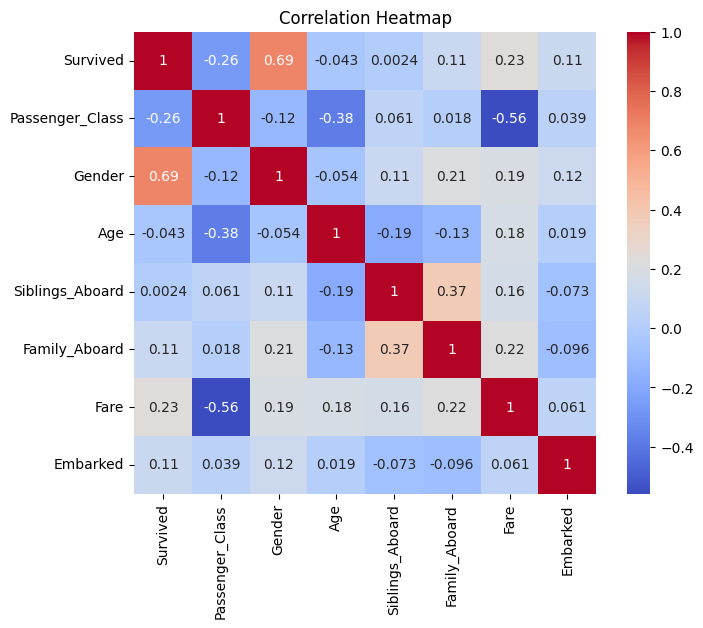

In [20]:
correlation_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

## Possible Explanations for Correlation Between Survival and Other Attributes

### Passenger Class (Moderate Negative Correlation)
- Passengers in higher classes (1st class, represented by the lowest numerical value) were more likely to survive compared to those in lower classes (2nd or 3rd class).  
- Likely due to better access to lifeboats and assistance during evacuation.

---

### Gender (Strong Positive Correlation)
- Females (encoded as 1) had a higher likelihood of survival compared to males (encoded as 0).  
- Aligns with the historical account of the Titanic's evacuation policy, where women and children were given priority for lifeboats.
---

### Age (Weak Negative Correlation)
- Younger passengers were marginally more likely to survive than older ones.  
- This might reflect children receiving priority for lifeboat access.  
- The effect is weak, possibly due to the low number of children on board.

---

### Siblings Aboard (Weak Negative Correlation)
- Having more siblings aboard slightly reduced the likelihood of survival.  
- Likely due to the challenge of coordinating survival among multiple family members during the chaos.  
- The effect is very minor.

---

### Family Aboard (Weak Positive Correlation)
- Having parents or children aboard slightly increased the likelihood of survival.  
- Family members may have helped each other during evacuation.  
- The effect is not strong.

---

### Fare (Positive Correlation)
- Passengers who paid higher fares were more likely to survive.  
- Higher fares were typically associated with higher passenger classes, which had better access to lifeboats and crew assistance.

---

### Embarked (Weak Positive Correlation)
- Passengers who embarked at Cherbourg (encoded as 1) and Queenstown (encoded as 2) were slightly more likely to survive than those who embarked at Southampton (encoded as 0).  
- This may reflect demographic differences or disparities in ticket type, class, or access to lifeboats among passengers from different ports.
---

## Visualizations to support the previous claims

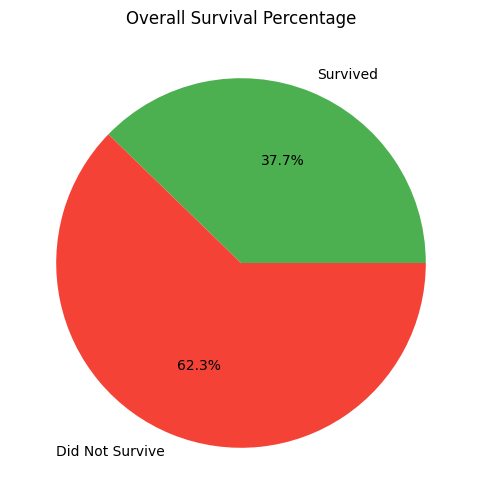

In [21]:
# Visualization 3: Pie Chart for Overall Survival
survival_labels = ['Survived', 'Did Not Survive']
survival_counts = [df[df['Survived'] == 1].shape[0], df[df['Survived'] == 0].shape[0]]
survival_percentage=round(df[df['Survived'] == 1].shape[0]/df.shape[0]*100,2)

plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=survival_labels, autopct='%1.1f%%', colors=['#4caf50', '#f44336'])
plt.title('Overall Survival Percentage')
plt.show()

Calculate the overall survival percentage as a baseline control metric.
This will serve as a reference point to compare survival rates across subsets of the dataset.

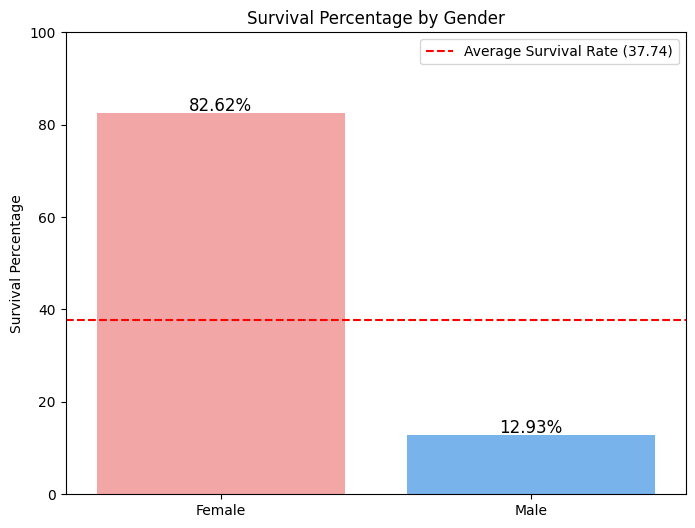

In [22]:
# Calculate variables for gender survival analysis
female_survivors = df[(df['Gender'] == 1) & (df['Survived'] == 1)].shape[0]
male_survivors = df[(df['Gender'] == 0) & (df['Survived'] == 1)].shape[0]

total_females = df[df['Gender'] == 1].shape[0]
total_males = df[df['Gender'] == 0].shape[0]

# Visualization 1: Survival by Gender
gender_labels = ['Female', 'Male']
gender_survival_rates = [
    (female_survivors / total_females) * 100 if total_females > 0 else 0,
    (male_survivors / total_males) * 100 if total_males > 0 else 0
]

# Plot the barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_labels, y=gender_survival_rates, palette=['#ff9999', '#66b3ff'])
plt.title('Survival Percentage by Gender')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)

# Add horizontal line at y=survival_percentage
plt.axhline(y=survival_percentage, color='r', linestyle='--', label=f'Average Survival Rate ({survival_percentage})')

# Show the legend
plt.legend()

# Add the value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

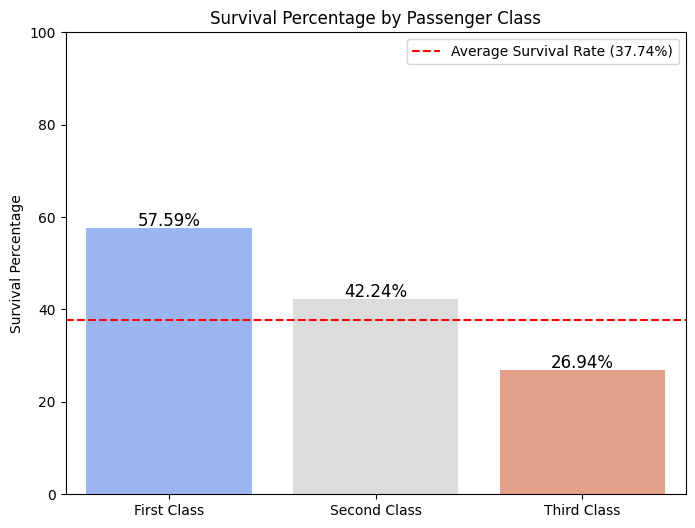

In [23]:
# Calculate variables for passenger class survival analysis
first_class_survivors = df[(df['Passenger_Class'] == 1) & (df['Survived'] == 1)].shape[0]
second_class_survivors = df[(df['Passenger_Class'] == 2) & (df['Survived'] == 1)].shape[0]
third_class_survivors = df[(df['Passenger_Class'] == 3) & (df['Survived'] == 1)].shape[0]

total_first_class = df[df['Passenger_Class'] == 1].shape[0]
total_second_class = df[df['Passenger_Class'] == 2].shape[0]
total_third_class = df[df['Passenger_Class'] == 3].shape[0]

# Visualization 2: Survival by Passenger Class
class_labels = ['First Class', 'Second Class', 'Third Class']
class_survival_rates = [
    (first_class_survivors / total_first_class) * 100 if total_first_class > 0 else 0,
    (second_class_survivors / total_second_class) * 100 if total_second_class > 0 else 0,
    (third_class_survivors / total_third_class) * 100 if total_third_class > 0 else 0
]

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_survival_rates, palette='coolwarm')
plt.title('Survival Percentage by Passenger Class')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)

# Add horizontal line at y=survival_percentage
plt.axhline(y=survival_percentage, color='r', linestyle='--', label=f'Average Survival Rate ({survival_percentage}%)')

# Show the legend
plt.legend()

# Add the value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

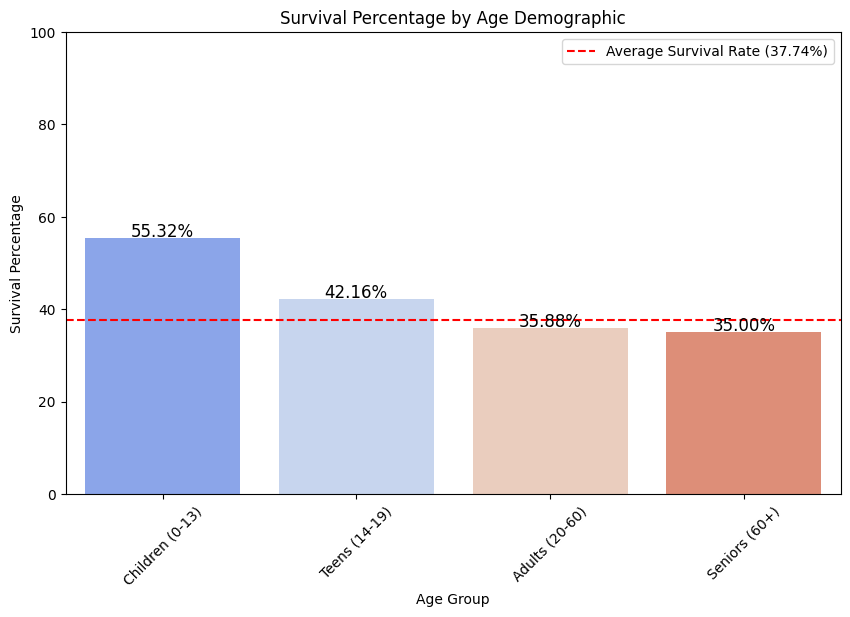

In [24]:
# Define age demographics
age_bins = [0, 13, 19, 60, 100]  # Children, Teens, Adults, Seniors
age_labels = ['Children (0-13)', 'Teens (14-19)', 'Adults (20-60)', 'Seniors (60+)']

# Add an age group column to the DataFrame
age_df = df.copy()
age_df['Age_Group'] = pd.cut(age_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate survival percentages by age group
age_group_survivors = age_df[age_df['Survived'] == 1].groupby('Age_Group').size()
age_group_totals = age_df.groupby('Age_Group').size()
age_group_survival_rates = (age_group_survivors / age_group_totals) * 100

# Visualization: Survival by Age Demographic
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_group_survival_rates.index, y=age_group_survival_rates, palette='coolwarm')
plt.title('Survival Percentage by Age Demographic')
plt.xlabel('Age Group')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Add horizontal line at y=survival_percentage
plt.axhline(y=survival_percentage, color='r', linestyle='--', label=f'Average Survival Rate ({survival_percentage}%)')

# Show the legend
plt.legend()

# Add the value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

## (III) K-Nearest Neighbors (KNN)

Running K-Nearest Neighbors (KNN)...


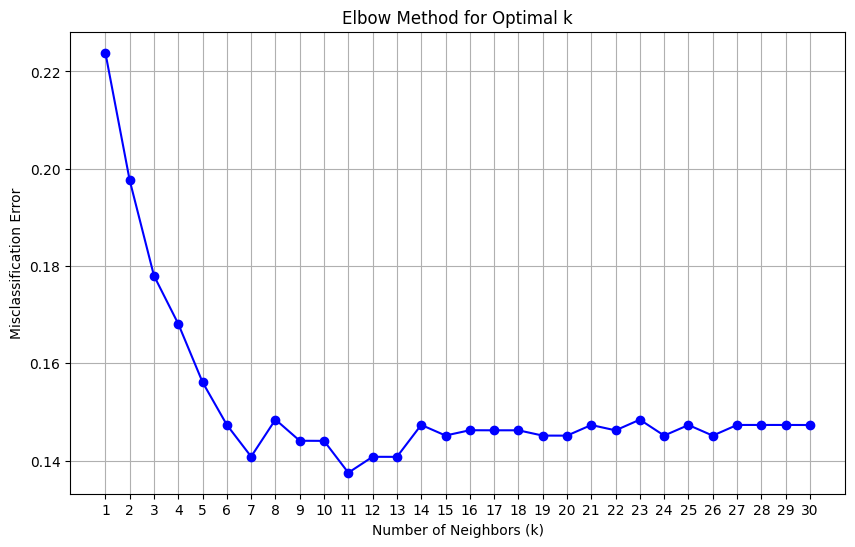

The optimal number of neighbors is k = 11


In [25]:
print("Running K-Nearest Neighbors (KNN)...")

# Step 4: Find the optimal k using the Elbow Method
k_values = range(1, 31)  # Testing k from 1 to 30
cv_scores = []  # Store cross-validation scores

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_standard, y_train, cv=10, scoring="accuracy")  # 10-fold cross-validation
    cv_scores.append(scores.mean())

# Calculate the misclassification error for each k
error_rates = [1 - score for score in cv_scores]

# Step 5: Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Misclassification Error")
plt.xticks(k_values)
plt.grid()
plt.show()

# Step 6: Select the best k (minimum error) and train the final model
optimal_k = k_values[np.argmin(error_rates)]
print(f"The optimal number of neighbors is k = {optimal_k}")

In [26]:
distance_metrics = ['euclidean', 'manhattan', 'minkowski','cityblock','cosine','l1','l2','nan_euclidean']
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    knn.fit(X_train_standard, y_train)
    y_pred = knn.predict(X_test_standard)

    print(f"\nMetric: {metric}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")


Metric: euclidean
Accuracy: 87.53%

Metric: manhattan
Accuracy: 88.80%

Metric: minkowski
Accuracy: 87.53%

Metric: cityblock
Accuracy: 88.80%

Metric: cosine
Accuracy: 87.53%

Metric: l1
Accuracy: 88.80%

Metric: l2
Accuracy: 87.53%

Metric: nan_euclidean
Accuracy: 87.53%


### Evaluating Distance Metrics for KNN

Various distance metrics were tested to assess their impact on KNN accuracy:

- **Best Performance**: Manhattan (and equivalents like Cityblock, L1) achieved the highest accuracy (88.80%).
- **Slightly Lower Accuracy**: Metrics like Euclidean, Minkowski, and Cosine scored 87.53%.
- **Key Insight**: The dataset aligns better with grid-like Manhattan calculations than straight-line (Euclidean) or angle-based (Cosine) measures.

**Conclusion**: Manhattan-based metrics are more effective for this dataset, highlighting the importance of tailoring distance metrics to data characteristics.

In [27]:
start_time = time.time()
# Define the KNN model
k = optimal_k  # Number of neighbors (you can change this)
knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')

# Train the model
knn.fit(X_train_standard, y_train)

# Make predictions
train_predictions = knn.predict(X_train_standard)
test_predictions = knn.predict(X_test_standard)

# Calculate accuracies
training_accuracy = accuracy_score(y_train, train_predictions)*100
testing_accuracy = accuracy_score(y_test, test_predictions)*100

# Print results
print(f"Training Accuracy: {training_accuracy:.2f}%")
print(f"Testing Accuracy: {testing_accuracy:.2f}%")

knn_report=classification_report(y_test, test_predictions, output_dict=True)
print(classification_report(y_test, test_predictions))

knn_train_time = time.time() - start_time
model_names.append("KNN")
training_accuracies.append(training_accuracy)
testing_accuracies.append(testing_accuracy)
runtimes.append(knn_train_time)

Training Accuracy: 86.24%
Testing Accuracy: 88.80%
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       244
           1       0.87      0.83      0.85       149

    accuracy                           0.89       393
   macro avg       0.88      0.88      0.88       393
weighted avg       0.89      0.89      0.89       393



In [28]:
knn_report

{'0': {'precision': 0.8968253968253969,
  'recall': 0.9262295081967213,
  'f1-score': 0.9112903225806451,
  'support': 244.0},
 '1': {'precision': 0.8723404255319149,
  'recall': 0.825503355704698,
  'f1-score': 0.8482758620689655,
  'support': 149.0},
 'accuracy': 0.8880407124681934,
 'macro avg': {'precision': 0.8845829111786558,
  'recall': 0.8758664319507097,
  'f1-score': 0.8797830923248053,
  'support': 393.0},
 'weighted avg': {'precision': 0.8875422906606926,
  'recall': 0.8880407124681934,
  'f1-score': 0.8873993439133672,
  'support': 393.0}}

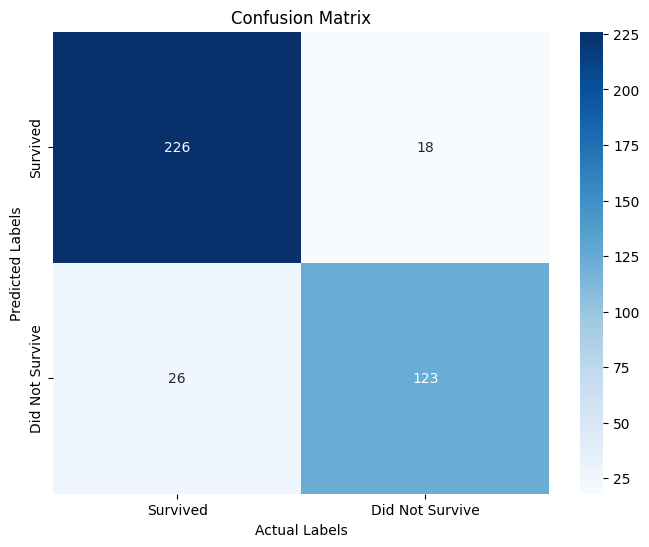

In [29]:
# Optional: Define class names
class_names = ['Survived', 'Did Not Survive']

# Plot using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

## (IV) Naive Bayes

In [30]:
start_time = time.time()
# Initialize Naive Bayes model
nb = GaussianNB()

# Fit the model
nb.fit(X_train_standard, y_train)

# Predict on the test data
y_pred_nb = nb.predict(X_test_standard)

# Calculate training time
nb_train_time = time.time() - start_time

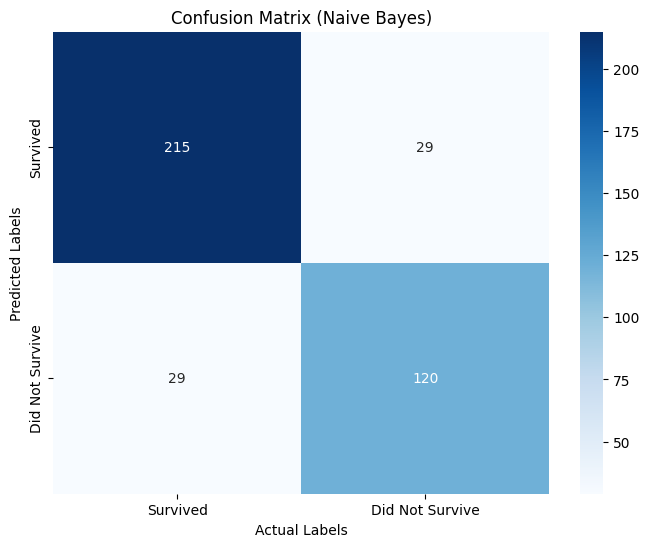

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

## Confusion Matrix - Naive Bayes Classifier

The confusion matrix below summarizes the performance of the Naive Bayes classifier in predicting survival outcomes.

|                 | **Actual: Survived** | **Actual: Not Survived** |
|-----------------|-----------------------|--------------------------|
| **Predicted: Survived**   | 215                   | 29                       |
| **Predicted: Not Survived** | 29                    | 120                      |

### Key Insights:
1. **True Positives (Top-Left, 215):**  
   The model correctly predicted 215 individuals who survived.

2. **False Negatives (Bottom-Left, 29):**  
   29 individuals who survived were incorrectly predicted as "Not Survived."

3. **False Positives (Top-Right, 29):**  
   29 individuals who did not survive were incorrectly predicted as "Survived."

4. **True Negatives (Bottom-Right, 120):**  
   The model correctly predicted 120 individuals who did not survive.

In [32]:
# Predict on training data
y_train_pred=nb.predict(X_train_standard)

# Calculate training accuracy
nb_training_accuracy = accuracy_score(y_train, y_train_pred)*100

print(f"Training Accuracy: {nb_training_accuracy:.2f}%")

# Calculate test accuracy
nb_test_accuracy = accuracy_score(y_test, y_pred_nb)*100

print(f"Test Accuracy: {nb_test_accuracy:.2f}%")

# Performance Metric
print("Naive Bayes Performance:")
nb_report=classification_report(y_test, y_pred_nb,output_dict=True)
print(classification_report(y_test, y_pred_nb))

model_names.append("Naive Bayes")
training_accuracies.append(nb_training_accuracy)
testing_accuracies.append(nb_test_accuracy)
runtimes.append(nb_train_time)

Training Accuracy: 84.50%
Test Accuracy: 85.24%
Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       244
           1       0.81      0.81      0.81       149

    accuracy                           0.85       393
   macro avg       0.84      0.84      0.84       393
weighted avg       0.85      0.85      0.85       393



## (V) Support Vector Machine (SVM)

In [33]:
start_time = time.time()

# Experiment with different kernel functions and regularization parameters
kernel_options = ['linear', 'rbf']
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1]

svm_params = {
    'kernel': kernel_options,
    'C': C_values,
    'gamma': gamma_values
}

svm = SVC()

grid_search_svm = GridSearchCV(svm, svm_params, cv=3, scoring='f1_weighted')
grid_search_svm.fit(X_train_standard, y_train)

best_svm = grid_search_svm.best_estimator_
print("Best SVM Parameters:", grid_search_svm.best_params_)
y_pred_svm = best_svm.predict(X_test_standard)

svm_train_time = time.time() - start_time

Best SVM Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


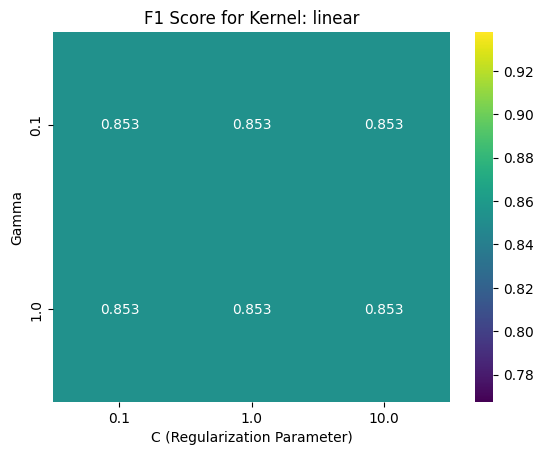

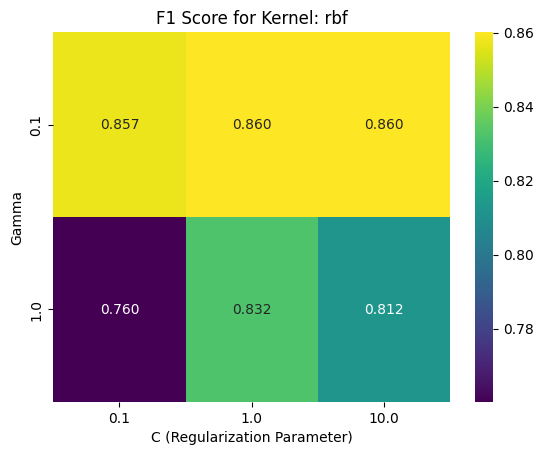

In [34]:
# Extract results from GridSearchCV
results = pd.DataFrame(grid_search_svm.cv_results_)
# Heatmap for F1-Score across C and gamma for each kernel type
for kernel in kernel_options:
    kernel_results = results[results['param_kernel'] == kernel]
    pivot_table = kernel_results.pivot_table(
        index='param_gamma',
        columns='param_C',
        values='mean_test_score'
    )
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
    plt.title(f"F1 Score for Kernel: {kernel}")
    plt.xlabel("C (Regularization Parameter)")
    plt.ylabel("Gamma")
    plt.show()


### Heatmap for F1-Score Across C and Gamma for Each Kernel Type

The following heatmaps visualize the F1-Score for each kernel type, varying with the regularization parameter `C` and the kernel coefficient `gamma`. These heatmaps were generated using the results from GridSearchCV applied to an SVM classifier.

Each heatmap shows the F1-Score as a function of the `C` and `gamma` parameters for the specified kernel type.

- **C**: The regularization parameter, controlling the trade-off between achieving a low error on the training data and minimizing the model complexity.
- **Gamma**: The kernel coefficient, influencing the decision boundary's flexibility.
- **Color Gradient**: Represents the F1 score, with brighter colors indicating better performanc

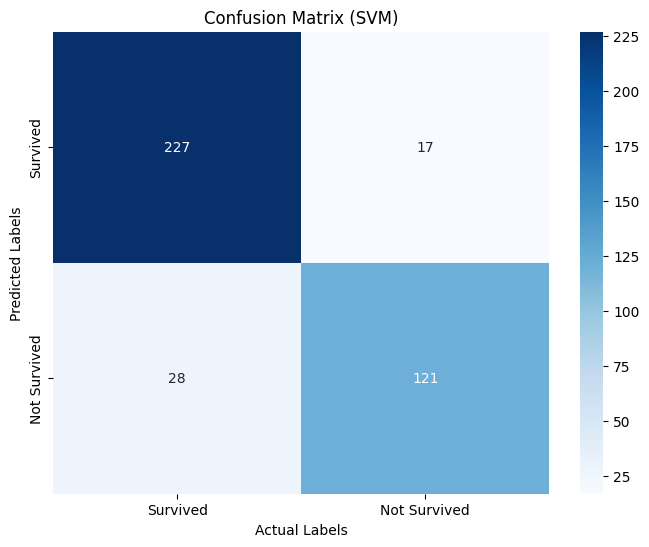

In [35]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
class_names = ['Survived', 'Not Survived']


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

## Confusion Matrix for SVM Model

The confusion matrix provides insights into the performance of the SVM model, highlighting the number of correctly and incorrectly classified samples.

|                 | **Actual: Survived** | **Actual: Not Survived** |
|-----------------|-----------------------|--------------------------|
| **Predicted: Survived**   | 227                   | 17                       |
| **Predicted: Not Survived** | 28                    | 121                      |

### Matrix Overview:
- **True Positives (Top-Left, 227):**  
   The model correctly predicted individuals who survived.  
- **True Negatives (Bottom-Right, 121):**  
   The model correctly identified individuals who did not survive.  
- **False Positives (Top-Right, 17):**  
   The model incorrectly predicted that individuals survived when they did not.  
- **False Negatives (Bottom-Left, 28):**  
   The model incorrectly predicted that individuals did not survive when they actually did.  


In [36]:
# Predict on training data
y_train_pred = best_svm.predict(X_train_standard)

# Calculate training accuracy
svm_training_accuracy = accuracy_score(y_train, y_train_pred)*100

print(f"Training Accuracy: {svm_training_accuracy:.2f}%")

# Calculate test accuracy
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)*100

print(f"Test Accuracy: {svm_test_accuracy:.2f}%")

print("SVM Performance:")
svm_report=classification_report(y_test, y_pred_svm,output_dict=True)
print(classification_report(y_test, y_pred_svm))

model_names.append("SVM")
training_accuracies.append(svm_training_accuracy)
testing_accuracies.append(svm_test_accuracy)
runtimes.append(svm_train_time)

Training Accuracy: 87.66%
Test Accuracy: 88.55%
SVM Performance:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       244
           1       0.88      0.81      0.84       149

    accuracy                           0.89       393
   macro avg       0.88      0.87      0.88       393
weighted avg       0.89      0.89      0.88       393



## (VI) Decision Tree

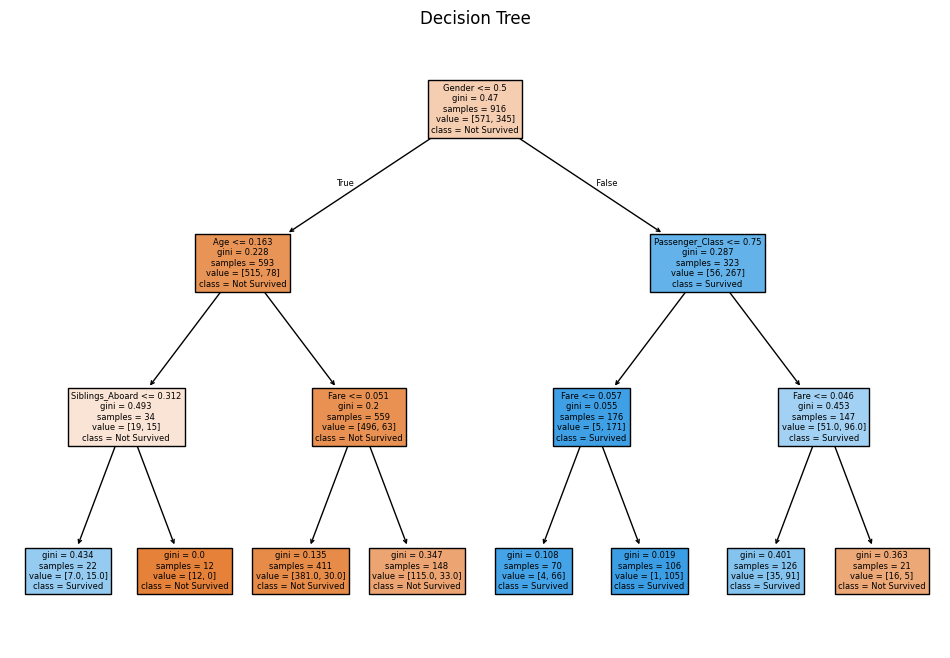

In [37]:
start_time = time.time()

# Define the Decision Tree model
decision_tree = DecisionTreeClassifier(
    max_depth=3,                # Limit the depth of the tree
    min_samples_split=4,        # Minimum samples needed to split a node
    min_samples_leaf=2,         # Minimum samples in a leaf node
    max_leaf_nodes=10,          # Maximum number of leaf nodes
    random_state=42
)

# Train the model
decision_tree.fit(X_train_minmax, y_train)

# Make predictions
train_predictions = decision_tree.predict(X_train_minmax)
test_predictions = decision_tree.predict(X_test_minmax)
tree_train_time = time.time() - start_time

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns,class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree")
plt.show()

- **DecisionTreeClassifier**: A supervised learning algorithm used for classification tasks.

### Observations
1. **Gender Influence**:
   - Female passengers (right subtree) had a higher survival rate.
   - Male passengers   (left subtree)  had a lower survival rate.

2. **Age and Fare**:
   - For females, **higher fares** and **Passenger Class** improved survival probability.
   - Among males, **younger ages** and **lower fares** improved survival probability.

3. **Pure Nodes**:
   - Some nodes (Gini = 0.0, 0.019) indicate near-perfect classification, where all samples belong to one class.

### Conclusion
- **Gender** is the most critical predictor of survival.
- **Fare, Age**, and **Passenger Class** are significant secondary predictors..

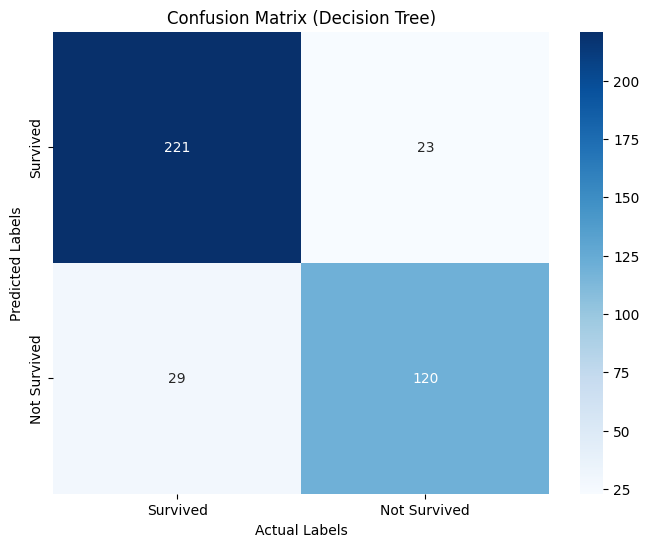

In [38]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

In [39]:
# Calculate accuracies
tree_training_accuracy = accuracy_score(y_train, train_predictions)*100
tree_testing_accuracy = accuracy_score(y_test, test_predictions)*100

# Print results
print(f"Training Accuracy: {tree_training_accuracy:.2f}%")
print(f"Testing Accuracy: {tree_testing_accuracy:.2f}%")
tree_report=classification_report(y_test, test_predictions,output_dict=True)
print(classification_report(y_test, test_predictions))

model_names.append("Decision Tree")
training_accuracies.append(tree_training_accuracy)
testing_accuracies.append(tree_testing_accuracy)
runtimes.append(tree_train_time)

Training Accuracy: 87.45%
Testing Accuracy: 86.77%
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       244
           1       0.84      0.81      0.82       149

    accuracy                           0.87       393
   macro avg       0.86      0.86      0.86       393
weighted avg       0.87      0.87      0.87       393



# (VII) Results Comparison

In [40]:
results = {
    'Algorithm': model_names,
    'Training Accuracy': training_accuracies,
    'Testing Accuracy': testing_accuracies,
    'Runtime (seconds)': runtimes,
    'Class 0 Precision': [
        knn_report['0']['precision'],
        nb_report['0']['precision'],
        svm_report['0']['precision'],
        tree_report['0']['precision']
    ],
    'Class 1 Precision': [
        knn_report['1']['precision'],
        nb_report['1']['precision'],
        svm_report['1']['precision'],
        tree_report['1']['precision']
    ],
    'Class 0 Recall': [
        knn_report['0']['recall'],
        nb_report['0']['recall'],
        svm_report['0']['recall'],
        tree_report['0']['recall']
    ],
    'Class 1 Recall': [
        knn_report['1']['recall'],
        nb_report['1']['recall'],
        svm_report['1']['recall'],
        tree_report['1']['recall']
    ],
    'Class 0 F1-Score': [
        knn_report['0']['f1-score'],
        nb_report['0']['f1-score'],
        svm_report['0']['f1-score'],
        tree_report['0']['f1-score']
    ],
    'Class 1 F1-Score': [
        knn_report['1']['f1-score'],
        nb_report['1']['f1-score'],
        svm_report['1']['f1-score'],
        tree_report['1']['f1-score']
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

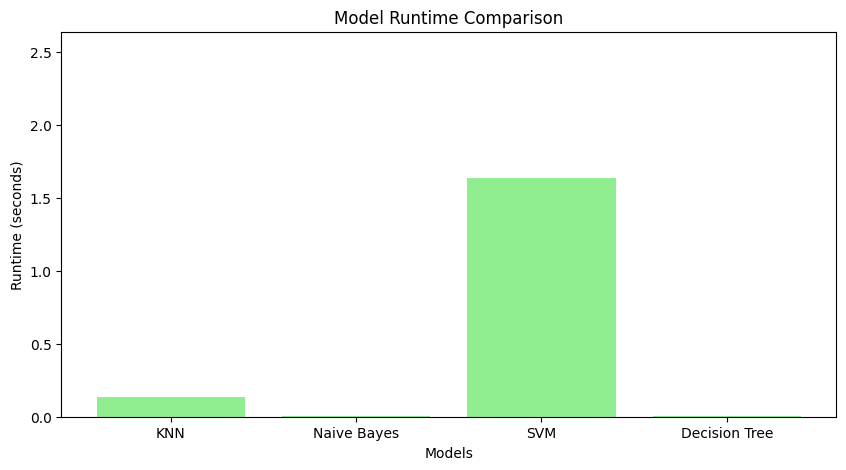

In [42]:
# Visualization for Runtime
plt.figure(figsize=(10, 5))
plt.bar(model_names, runtimes, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Runtime (seconds)')
plt.title('Model Runtime Comparison')
plt.ylim(0, max(runtimes) + 1)
plt.show()

### **Conclusion**  
In evaluating the four machine learning algorithms for predicting Titanic survivors, their execution time was compared to assess computational efficiency.  

---

### **Summary of Findings**  
- **KNN**: Had the average runtime out of the four.
- **Naive Bayes** and **Decision Tree**: Had an almost zero runtime, performing the computations with very hgih speed.  
- **SVM**: Had the highest runtime, indicating that it is the most computationally intensive model.  

### **Final Recommendation**   
**SVM** offers strong performance but its high runtime may limit use for large datasets or real-time applications.  

For faster execution, **Naive Bayes, Decision Tree, and KNN** are recommended for their efficiency. If runtime is not a concern, **SVM** is a strong choice for its balanced performance across all metrics.


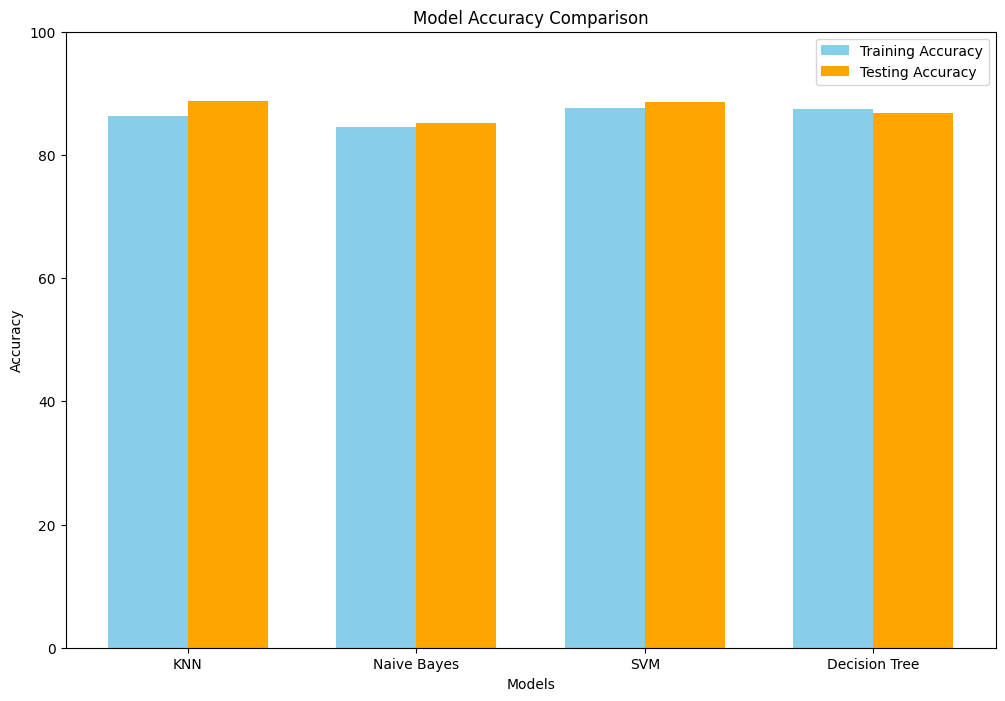

In [41]:
# Visualization for Accuracy
plt.figure(figsize=(12, 8))
x = np.arange(len(model_names))
bar_width = 0.35

plt.bar(x - bar_width / 2, training_accuracies, width=bar_width, label='Training Accuracy', color='skyblue')
plt.bar(x + bar_width / 2, testing_accuracies, width=bar_width, label='Testing Accuracy', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, model_names)
plt.ylim(0, 100)
plt.legend()
plt.show()

### **Conclusion**
The image shows a comparison of the training accuracy and testing accuracy for four different machine learning models: KNN, Naive Bayes, SVM, and Decision Tree.

In predicting Titanic survivors, the four machine learning algorithms were evaluated based on the following performance metrics:

### **Summary of Findings**
- **KNN**: The testing accuracy is slightly higher than the training accuracy, indicating apparent but small level of underfitting.
- **Naive Bayes**: The lowest training and testing accuracy.
- **SVM**: The highest training and testing accuracy.
- **Decision Tree**: The training accuracy is slightly higher than the testing accuracy, indicating apparent but small level of overfitting.
---
### **Final Recommendation**
- Ordering the models based on the smallest gaps between training and testing accuracy (The smaller the gap, the better the generalization of data):
1. **Naive Bayes**
2. **Decision Tree**
3. **SVM**
4. **KNN**

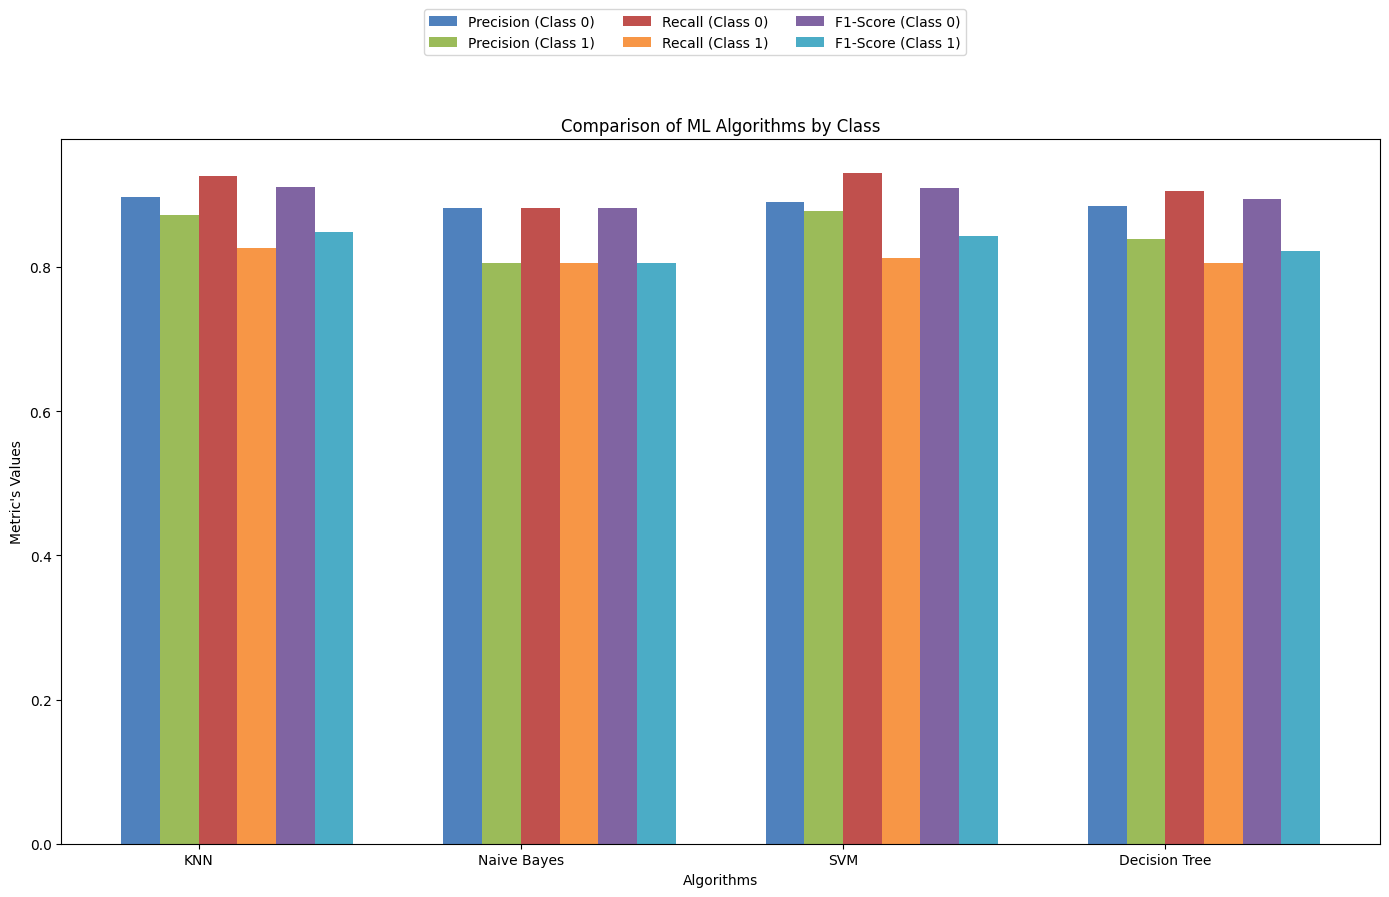

In [43]:
# Visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

bar_width = 0.12
index = np.arange(len(results_df['Algorithm']))  # Default index for each algorithm

# Plot bars for Class 0 and Class 1 Precision
ax1.bar(index - 1.5 * bar_width, results_df['Class 0 Precision'], bar_width, label='Precision (Class 0)', color='#4F81BD')
ax1.bar(index - 0.5 * bar_width, results_df['Class 1 Precision'], bar_width, label='Precision (Class 1)', color='#9BBB59')

# Plot bars for Class 0 and Class 1 Recall
ax1.bar(index + 0.5 * bar_width, results_df['Class 0 Recall'], bar_width, label='Recall (Class 0)', color='#C0504D')
ax1.bar(index + 1.5 * bar_width, results_df['Class 1 Recall'], bar_width, label='Recall (Class 1)', color='#F79646')

# Plot bars for Class 0 and Class 1 F1-Score
ax1.bar(index + 2.5 * bar_width, results_df['Class 0 F1-Score'], bar_width, label='F1-Score (Class 0)', color='#8064A2')
ax1.bar(index + 3.5 * bar_width, results_df['Class 1 F1-Score'], bar_width, label='F1-Score (Class 1)', color='#4BACC6')

# Set labels, title, and ticks
ax1.set_xlabel('Algorithms')
ax1.set_ylabel("Metric's Values")
ax1.set_title('Comparison of ML Algorithms by Class')
ax1.set_xticks(index)
ax1.set_xticklabels(results_df['Algorithm'])

# Add legends
fig.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3)

# Show plot
plt.tight_layout()
plt.show()

### **Conclusion**
In predicting Titanic survivors, the four machine learning algorithms were evaluated based on the following performance metrics:
1. **Precision**  
2. **Recall**  
3. **F1 Score**
### **Summary of Findings**
- **KNN**: Had the best performance for recall and f1-score on both survivors and non-survivors.  
- **Naive Bayes**: Had relatively lower performance compared to its counterparts.  
- **SVM** and **Decision Tree**: Had a strong and balanced performance across all metrics.  
---
### **Final Recommendation**
- While an algorithm (Naive Bayes) showed lower performance than the rest,
- still the four algorithms are on the higher spectrum of the scale and all shared consistently high performance across all metric values
- **Thus, the four models recommended for Titanic survival prediction, with slight reservations regarding the Naive Bayes algorithm.**